In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 10 11:37:52 2020

@author: eric

Integration script for IAP instruments

Example:
    E...

        $ python example_google.py

Attributes:
    module_level_variable1 (int): Module level variables may be documented in
        either the ``Attributes`` section of the module docstring, or in an
        inline docstring immediately following the variable.

        Either form is acceptable, but the two should not be mixed. Choose
        one convention to document module level variables and be consistent
        with it.

Todo: all

"""

from abc import ABC
import os
import datetime
import numpy as np
import xarray as xr
import pandas as pd
import netCDF4
import matplotlib.pyplot as plt
from utils_GROSOM import save_single_pdf
import mopi5_classes as mc
import mopi5_library

from matplotlib.ticker import (
    MultipleLocator, FormatStrFormatter, AutoMinorLocator)

from matplotlib.lines import Line2D
import plotly_express as px



# Some title

## some subtitle

In [2]:
instrument_name = "mopi5"
# date = datetime.date(2019,2,21)
# date = pd.date_range(start='2019-01-03', end='2019-01-05')
# meanTb_chunks = [95, 100, 110, 120, 130, 140, 180]
# lowerBound = [0, 95, 100, 110, 120, 130, 140, 180]

# date = pd.date_range(start='2019-01-30', end='2019-06-18')

date = pd.date_range(start='2019-01-30', end='2019-02-22')
meanTb_chunks = [80, 85, 90, 95, 100, 105,
                 110, 115, 120, 130, 140, 150, 170, 190]
lowerBound = [0, 80, 85, 90, 95, 100, 105,
              110, 115, 120, 130, 140, 150, 170, 190]

# date = pd.date_range(start='2019-05-01', end='2019-05-04')
# No U5303

# date = pd.date_range(start='2019-04-25', end='2019-04-27')
# meanTb_chunks = [105, 110, 115, 120, 130, 160, 180, 200]
# lowerBound = [0, 105, 110, 115, 120, 130, 160, 180, 200]

# date = pd.date_range(start='2019-06-11', end='2019-06-15')
# meanTb_chunks = [110, 120, 130, 140, 150, 160, 170, 180, 200, 220]

# date = pd.date_range(start='2019-03-12', end='2019-03-12')
# date = pd.date_range(start='2019-02-22', end='2019-02-22')
# options are: 'TOD', 'TOD_harmo', 'classic' 'meanTb_harmo', or 'meanTb'

integration_strategy = 'meanTb_harmo'
int_time = 1

plot_ts_Tb_Tsys = False
df_bins = 200e3
date1b = pd.to_datetime(date[-1])

plot_comparison = False
plot_fancy1 = False
plot_fancy2 = True
plot_interp_facny3 = False
plot_bias = True
plot_bias_TOD = False
plot_o3 = False
plot_o3_sel = False

# Define the parameters for integration
# TOD = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
# interval = np.ones(len(TOD))
TOD = np.arange(24)
interval = 0.5*np.ones(len(TOD))
# TOD = [3, 9, 15, 21]

classic = np.arange(1, 24)


In [3]:

basename_lvl1 = "/scratch/MOPI5/Level1/"
basename_lvl2 = "/scratch/MOPI5/Level2/"
basename_lvl1 = "/home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/"
basename_lvl2 = "/home/eric/Documents/PhD/DATA/MOPI5/Level2/"
# calibration = mc.IntegrationMOPI5(date, basename_lvl1, integration_strategy, int_time, ['AC240','USRP-A'])
integration = mc.MOPI5_LvL2(date1b, basename_lvl1, basename_lvl2,
                            integration_strategy, integration_time=int_time)
 # Plotting part
integrated_data, integrated_flags, integrated_meteo = integration.read_level1b(
     no_flag=True, meta_data=False)
if integration_strategy == 'meanTb' or integration_strategy == 'meanTb_harmo':
    identifier_plot = integrated_data['AC240'].coords['chunks'].data[1:].tolist(
    ) + [300]
    # identifier_plot = meanTb_chunks  + [300]
    idx_all = np.arange(0, len(identifier_plot))
    dimension = ['chunks', 'channel_idx']
else:
    dimension = ['time', 'channel_idx']
    identifier_plot = TOD
    idx_all = np.arange(0, len(TOD))
param_slope_broadband = [111.2e9, 25e6, 110.5e9, 25e6]
param_slope = {'AC240': param_slope_broadband,
               'USRP-A': [110.84e9, 5e6, 110.72e9, 5e6], 'U5303': param_slope_broadband}
if plot_fancy1:
        integration.compare_spectra_mopi5(
            spectrometers=['U5303'],
            dim=dimension[0],
            idx=idx_all,
            # idx=[0,1,2,3],
            save_plot=True,
            identifier=identifier_plot,
            lowerBound=lowerBound,
            with_corr=False,
            corr_band=param_slope,
            title='',
        )

Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_02_22


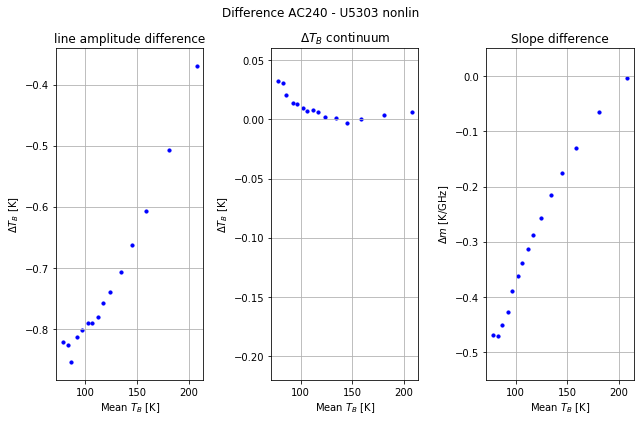

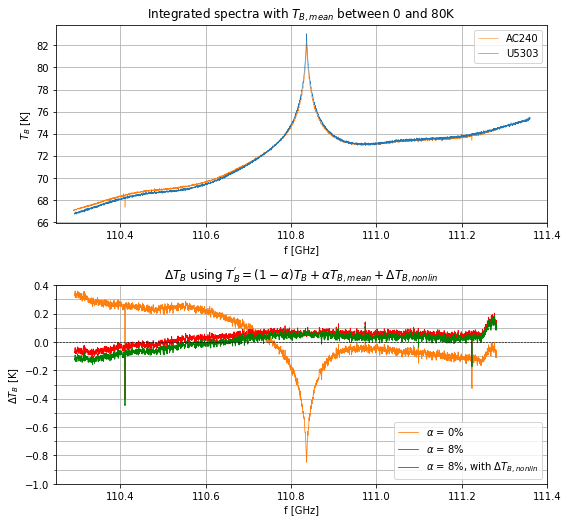

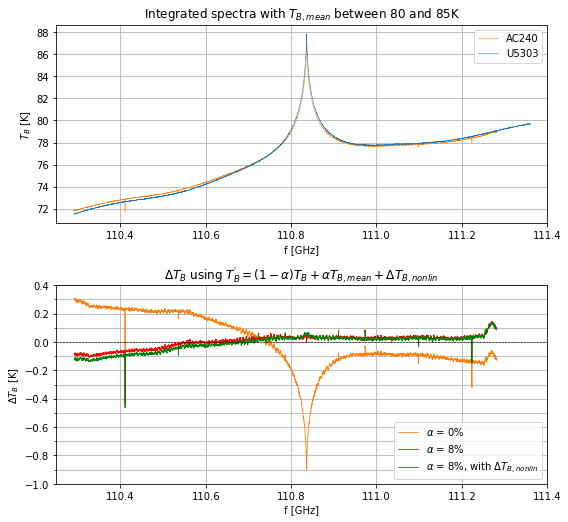

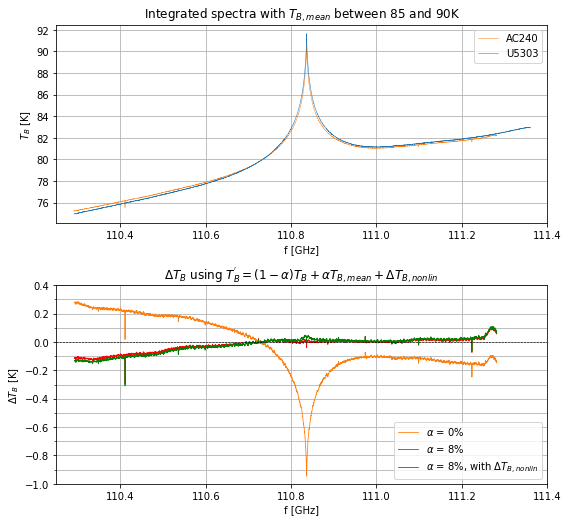

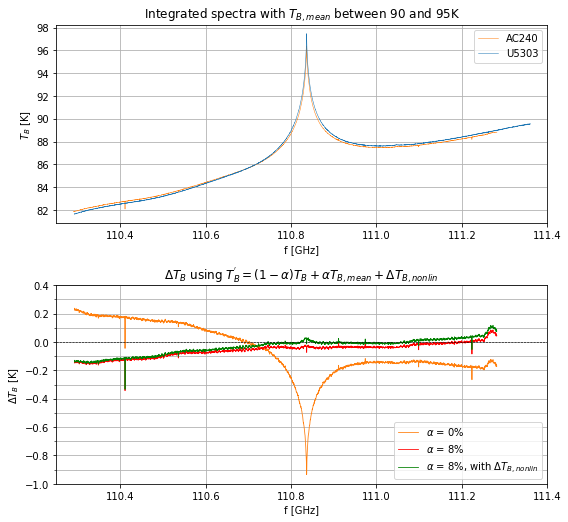

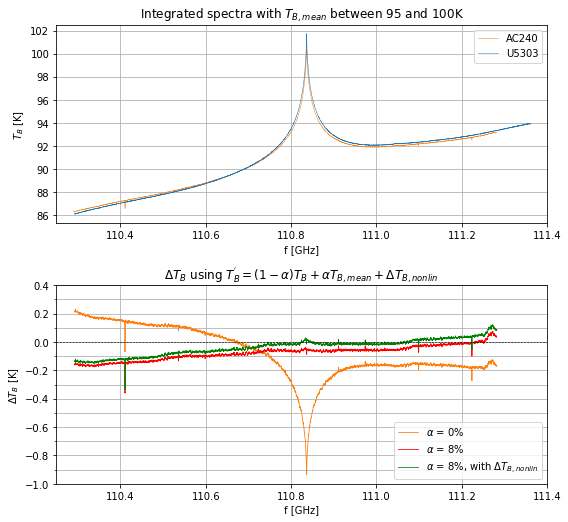

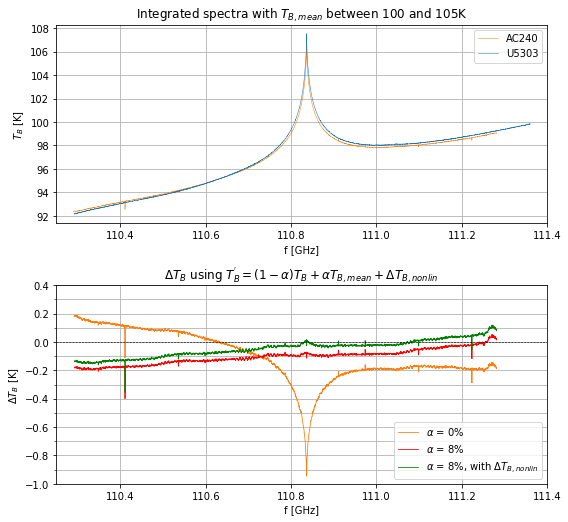

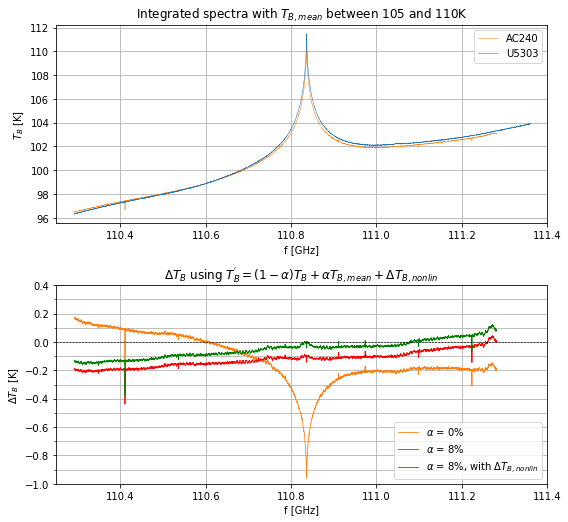

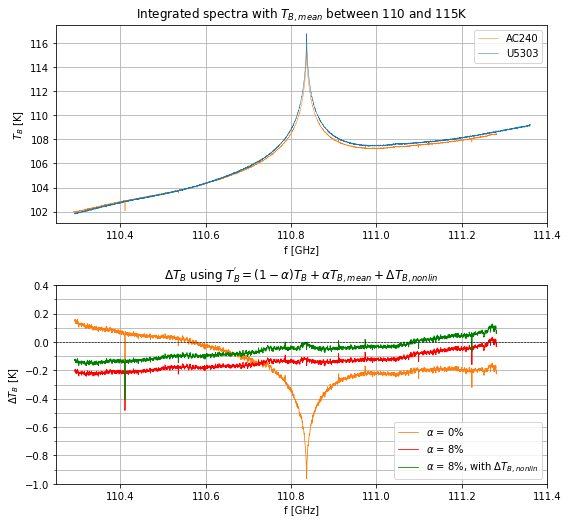

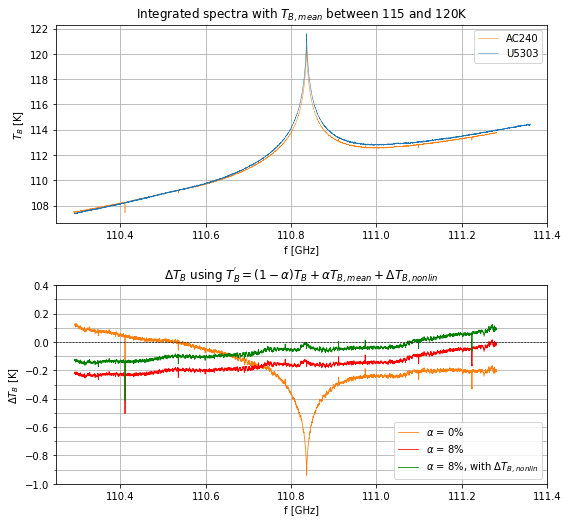

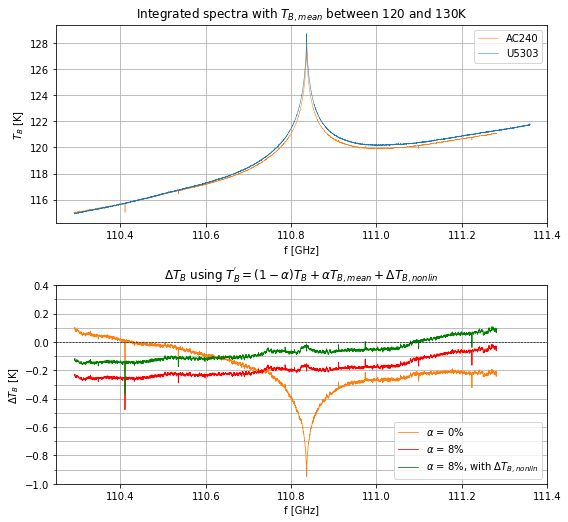

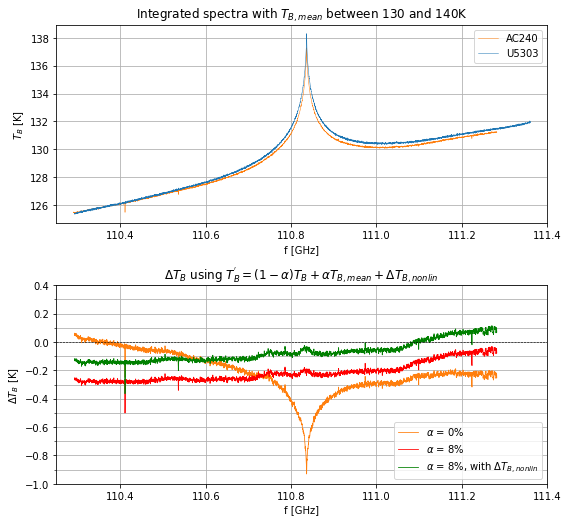

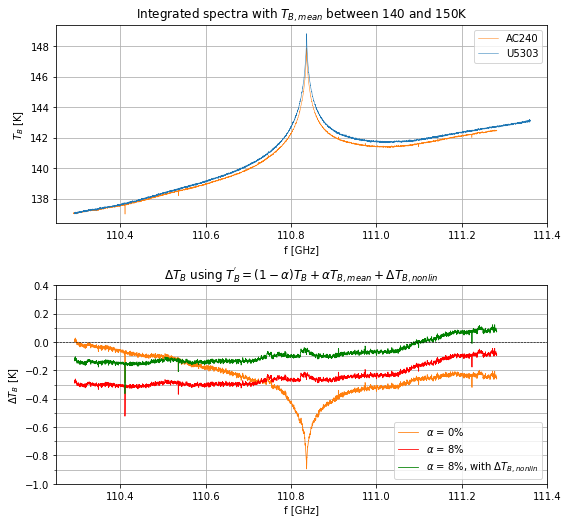

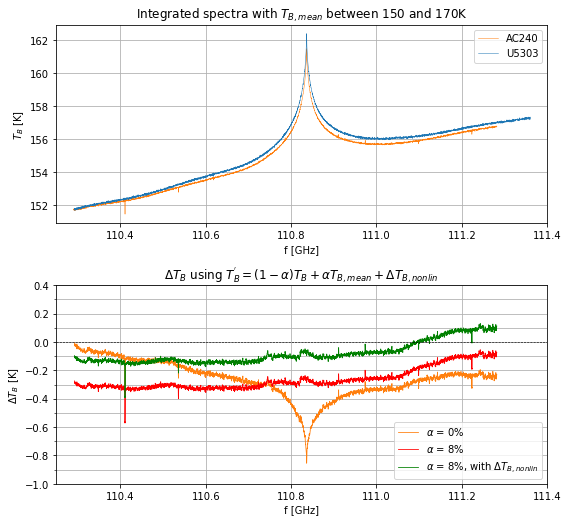

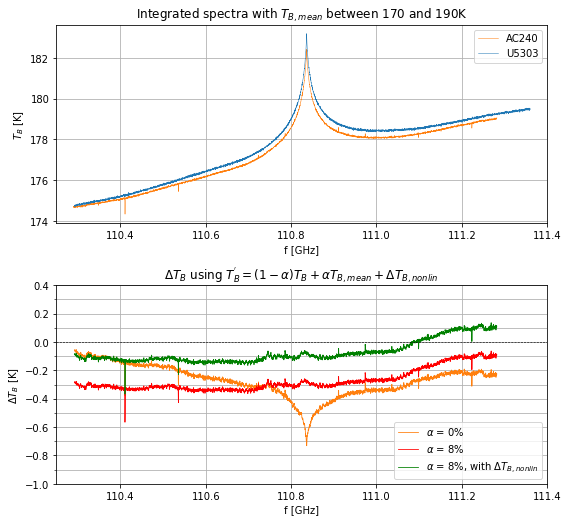

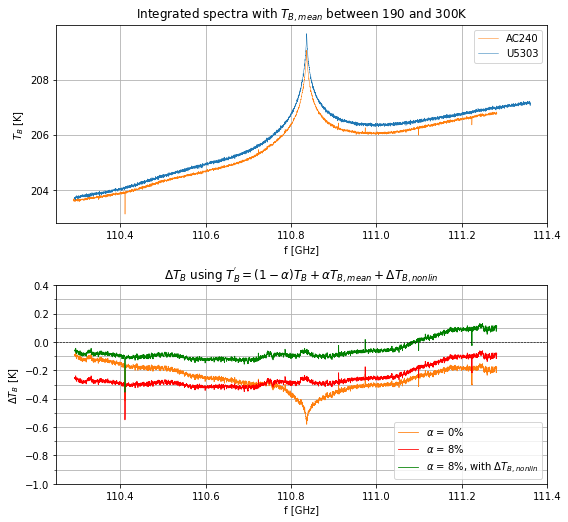

In [4]:
if plot_fancy2:
    #     integration.compare_spectra_binned_interp_mopi5(
    #         dim=dimension[0],
    #         idx=idx_all,
    #         spectrometers=['AC240','USRP-A'],
    #         save_plot = True,
    #         use_basis='U5303',
    #         #identifier=TOD,
    #         identifier=identifier_plot,
    #         clean=True
    # )
    # Fitting the correction factors
    line_amplitude_diff = (integrated_data['AC240'].line_amplitude -
                           integrated_data['U5303'].line_amplitude)/integrated_data['AC240'].line_amplitude
    # fitted_factor = np.polyfit(integrated_data['AC240'].mean_Tb, line_amplitude_diff, deg=1)
    # fitted_poly = np.poly1d(fitted_factor)
    continuum_amplitude_diff = integrated_data['AC240'].continuum_value_line_center - \
        integrated_data['U5303'].continuum_value_line_center
    fitted_factor_continuum = np.polyfit(
        integrated_data['AC240'].mean_Tb, continuum_amplitude_diff, deg=2)
    fitted_poly_continuum = np.poly1d(fitted_factor_continuum)
    theoretical_nonlinearities = np.polyfit(
        [80, 186, 292], [0, -0.20, 0], deg=2)
    fitted_poly_theoretical_nonlinearities = np.poly1d(
        theoretical_nonlinearities)
    s = 'U5303'
    # plt.plot(integrated_data[s].bin_freq_interp.data, integrated_data[s].interpolated_Tb[11].data, 'k-', linewidth=0.4)
    # plt.plot(integrated_data[s].bin_freq_interp.data, integrated_data[s].interpolated_Tb[11].data+fitted_poly_theoretical_nonlinearities(integrated_data[s].interpolated_Tb[11].data), 'r-', linewidth=0.4)
    non_lin = fitted_poly_theoretical_nonlinearities(
        integrated_data[s].interpolated_Tb.data)
    param_slope = {'AC240': param_slope_broadband,
                   'USRP-A': [110.84e9, 5e6, 110.72e9, 5e6], 'U5303': param_slope_broadband}
    integrated_data = integration.add_bias_characterization_with_non_linearities(
        spectrometers=['U5303'],
        dim=dimension[0],
        param_slope=param_slope,
        around_center_value=1e6
    )
    fig2 = plt.figure(figsize=(9, 6))
    ax1 = fig2.add_subplot(1, 3, 1)
    ax2 = fig2.add_subplot(1, 3, 2)
    ax3 = fig2.add_subplot(1, 3, 3)
    color = 'b'
    s = 'AC240'
    scatter = ax1.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].line_amplitude.data -
                          integrated_data['U5303'].line_amplitude_nonlin.data, s=10, color=color)
    ax1.set_ylabel(r'$\Delta T_B$ [K]')
    # ax1.set_ylim(-2,0)
    # ax1.set_ylim(-1,0.5)
    ax1.set_title('line amplitude difference')
    ax1.set_xlabel('Mean $T_B$ [K]')
    # ax1.set_ylim(-0.92,-0.25)
    ax2.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].continuum_value_line_center.data -
                integrated_data['U5303'].continuum_value_line_center_nonlin.data, s=10, color=color)
    ax2.set_ylabel(r'$\Delta T_B$ [K]')
    ax2.set_xlabel('Mean $T_B$ [K]')
    ax2.set_title(r'$\Delta T_B$ continuum')
    ax2.set_ylim(-0.22, 0.06)
    # ax2.set_ylim(-1,1)
    ax3.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].slope_indiv *
                1e9-integrated_data['U5303'].slope_indiv_nonlin.data*1e9, s=10, color=color)
    ax3.set_ylabel(r'$\Delta m$ [K/GHz]')
    # ax3.set_ylim(-0.8,0.2)
    ax3.set_ylim(-0.55, 0.05)
    ax3.set_title('Slope difference')
    ax3.set_xlabel('Mean $T_B$ [K]')
    ax1.grid()
    ax2.grid()
    ax3.grid()
    fig2.suptitle('Difference AC240 - U5303 nonlin')
    fig2.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()
    # plt.plot(integrated_data['AC240'].mean_Tb, continuum_amplitude_diff,'x')
    # plt.plot(np.arange(70,300,10), fitted_poly_theoretical_nonlinearities(np.arange(70,300,10)))
    # slope_diff = integrated_data['AC240'].slope_indiv - integrated_data['U5303'].slope_indiv
    # corr_slope = integrated_data['AC240'].Tb + slope_diff*(integrated_data['AC240'].intermediate_freq)
    # integration.compare_spectra_binned_interp_mopi5_factor(
    #     dim=dimension[0],
    #     idx=idx_all,
    #     spectrometers=['AC240'],
    #     save_plot = True,
    #     use_basis='U5303',
    #     #identifier=TOD,
    #     identifier=identifier_plot,
    #     alpha=[0,7,8,9],
    #     binning=2,
    #     lowerBound=lowerBound,
    # )
    integration.compare_spectra_binned_interp_mopi5_factor(
        dim=dimension[0],
        idx=idx_all,
        spectrometers=['AC240'],
        save_plot=True,
        use_basis='U5303',
        # identifier=TOD,
        identifier=identifier_plot,
        # alpha=-100*line_amplitude_diff.data,
        alpha=8*np.ones(15),
        binning=4,
        lowerBound=lowerBound,
        variable=True,
        broadband_bias=non_lin
    )


Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_04_27


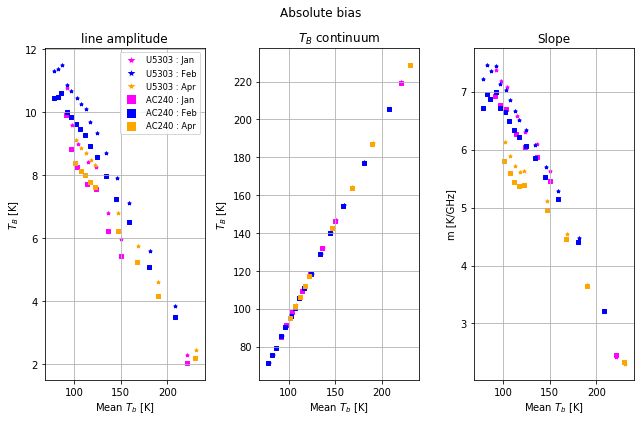

Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_04_27


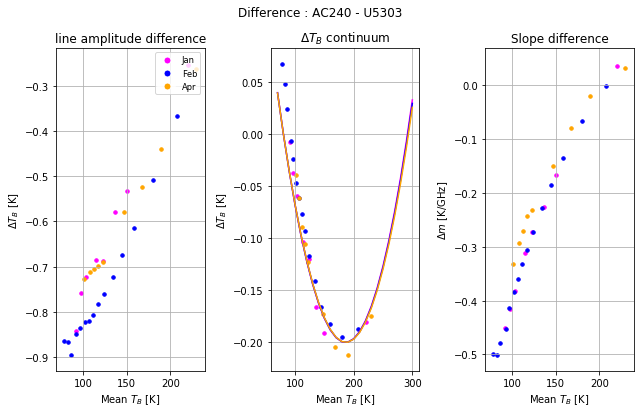

Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_04_27


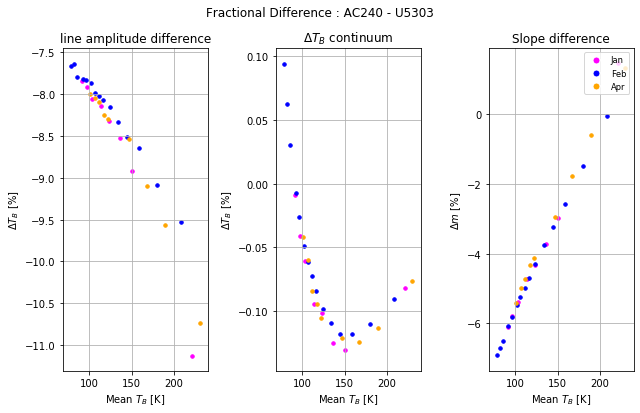

Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_01_05
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_02_22
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_U5303_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_AC240_2019_04_27
Read :  /home/eric/Documents/PhD/DATA/MOPI5/Level1b_Good/mopi5_level1b_meanTb_harmo_USRP-A_2019_04_27


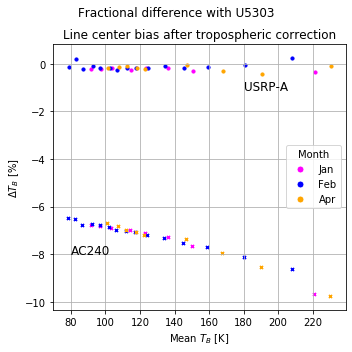

In [5]:
if plot_bias:
    end_dates = [datetime.date(2019, 1, 5), datetime.date(
        2019, 2, 22), datetime.date(2019, 4, 27)]
    monthly_color = ['magenta', 'blue', 'cyan', 'orange', 'red']
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
    size = 12
    figures = list()
    fig = plt.figure(figsize=(9, 6))
    ax1 = fig.add_subplot(1, 3, 1)
    ax2 = fig.add_subplot(1, 3, 2)
    ax3 = fig.add_subplot(1, 3, 3)
    # fig2.subplots_adjust(hspace=0.4, wspace=0.1)
    count = 0
    symbol = {'U5303': '*', 'AC240': 's'}
    for d in end_dates:
        try:
            integration = mc.MOPI5_LvL2(
                d, basename_lvl1, basename_lvl2, integration_strategy, integration_time=int_time)
            integrated_data, integrated_flags, integrated_meteo = integration.read_level1b(
                no_flag=True, meta_data=False)
            color = monthly_color[d.month-1]
            for s in ['U5303', 'AC240']:
                scatter = ax1.scatter(
                    integrated_data[s].mean_Tb.data, integrated_data[s].line_amplitude.data, s=size, marker=symbol[s], color=monthly_color[d.month-1])
                ax1.set_ylabel(r'$T_B$ [K]')
                # ax1.set_ylim(-2,0)
                # ax1.set_ylim(-1,0.5)
                ax1.set_title('line amplitude')
                ax1.set_xlabel('Mean $T_b$ [K]')
                ax2.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].continuum_value_line_center.data,
                            s=size, marker=symbol[s], color=monthly_color[d.month-1])
                ax2.set_ylabel(r'$T_B$ [K]')
                ax2.set_xlabel('Mean $T_b$ [K]')
                ax2.set_title('$T_B$ continuum')
                # ax2.set_ylim(-2,0)
                # ax2.set_ylim(-1,1)
                ax3.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].slope_indiv *
                            1e9, s=size, marker=symbol[s], color=monthly_color[d.month-1])
                ax3.set_ylabel('m [K/GHz]')
                # ax3.set_ylim(-0.8,0.2)
                ax3.set_title('Slope')
                ax3.set_xlabel('Mean $T_b$ [K]')
         
        except: 
            print('no data for :', d)
            pass
    legend_elements_both = [
        Line2D([0], [0], marker=symbol['U5303'], color='w', markerfacecolor='magenta',
               label='U5303 : '+month_name[0], markersize=size-2),
        Line2D([0], [0], marker=symbol['U5303'], color='w', markerfacecolor='blue',
               label='U5303 : '+month_name[1], markersize=size-2),
        Line2D([0], [0], marker=symbol['U5303'], color='w', markerfacecolor='orange',
               label='U5303 : '+month_name[3], markersize=size-2),
        Line2D([0], [0], marker=symbol['AC240'], color='w', markerfacecolor='magenta',
               label='AC240 : '+month_name[0], markersize=size-2),
        Line2D([0], [0], marker=symbol['AC240'], color='w', markerfacecolor='blue',
               label='AC240 : '+month_name[1], markersize=size-2),
        Line2D([0], [0], marker=symbol['AC240'], color='w', markerfacecolor='orange',
               label='AC240 : '+month_name[3], markersize=size-2)
    ]
    # legend = ax2.legend(*scatter.legend_elements(prop='marker'),['U5303','AC240'] , fontsize='xx-small',loc=1, title='Month')
    # ax2.add_artist(legend)
    # ax2.legend(['U5303','AC240'], fontsize='small')
    ax1.legend(handles=legend_elements_both, fontsize='small', loc=1)
    # ax2.legend(handles=legend_elements_spectro, fontsize='small',loc=1)
    ax1.grid()
    ax2.grid()
    ax3.grid()
    fig.suptitle('Absolute bias')
    fig.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()
    figures.append(fig)
    # save_single_pdf(basename_lvl1+'full_bias_-500-200Mhz'+'_'+integration_strategy+'.pdf',figures)
    fig2 = plt.figure(figsize=(9, 6))
    ax1 = fig2.add_subplot(1, 3, 1)
    ax2 = fig2.add_subplot(1, 3, 2)
    ax3 = fig2.add_subplot(1, 3, 3)
    fig2.subplots_adjust(hspace=0.1, wspace=0)
    count = 0
    for d in end_dates:
        try:
            integration = mc.MOPI5_LvL2(
                d, basename_lvl1, integration_strategy, integration_strategy, integration_time=int_time)
            integrated_data, integrated_flags, integrated_meteo = integration.read_level1b(
                no_flag=True, meta_data=False)
            color = monthly_color[d.month-1]
            s = 'AC240'
            scatter = ax1.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].line_amplitude.data -
                                  integrated_data['U5303'].line_amplitude.data, s=size, color=color)
            ax1.set_ylabel(r'$\Delta T_B$ [K]')
            # ax1.set_ylim(-2,0)
            # ax1.set_ylim(-1,0.5)
            ax1.set_title('line amplitude difference')
            ax1.set_xlabel('Mean $T_B$ [K]')
            THot = np.mean(integrated_data[s].THot.data)
            theoretical_nonlinearities = np.polyfit(
                [80, (THot+80)/2, THot], [0, -0.2, 0], deg=2)
            fitted_poly_theoretical_nonlinearities = np.poly1d(
                theoretical_nonlinearities)
            ax2.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].continuum_value_line_center.data -
                        integrated_data['U5303'].continuum_value_line_center.data, s=size, color=color)
            ax2.plot(np.arange(70, 310, 10), fitted_poly_theoretical_nonlinearities(
                np.arange(70, 310, 10)), '-', color=color)
            ax2.set_ylabel(r'$\Delta T_B$ [K]')
            ax2.set_xlabel('Mean $T_B$ [K]')
            ax2.set_title(r'$\Delta T_B$ continuum')
            # ax2.set_ylim(-2,0)
            # ax2.set_ylim(-1,1)
            ax3.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].slope_indiv *
                        1e9-integrated_data['U5303'].slope_indiv.data*1e9, s=size, color=color)
            ax3.set_ylabel(r'$\Delta m$ [K/GHz]')
            # ax3.set_ylim(-0.8,0.2)
            ax3.set_title('Slope difference')
            ax3.set_xlabel('Mean $T_B$ [K]')
        except:
            print('no data for :', d)
            pass
    legend_elements = [
        Line2D([0], [0], marker='.', color='w', markerfacecolor='magenta',
               label=month_name[0], markersize=size+2),
        Line2D([0], [0], marker='.', color='w', markerfacecolor='blue',
               label=month_name[1], markersize=size+2),
        Line2D([0], [0], marker='.', color='w', markerfacecolor='orange',
               label=month_name[3], markersize=size+2)
    ]
    # legend = ax1.legend(*scatter.legend_elements(prop='colors'), month_name, fontsize='xx-small',loc=1, title='Month')
    # ax1.add_artist(legend)
    # ax2.legend(['U5303','AC240'], fontsize='small')
    ax1.grid()
    ax2.grid()
    ax3.grid()
    fig2.suptitle('Difference : '+s+' - U5303')
    ax1.legend(handles=legend_elements, fontsize='small', loc=1)
    # fig.suptitle('Mean hot counts')
    fig2.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    figures.append(fig2)
    fig3 = plt.figure(figsize=(9, 6))
    ax3 = fig3.add_subplot(1, 3, 3)
    ax1 = fig3.add_subplot(1, 3, 1)
    ax2 = fig3.add_subplot(1, 3, 2)
    size = 6
    count = 0
    for d in end_dates:
        try:
            integration = mc.MOPI5_LvL2(
                d, basename_lvl1, basename_lvl2, integration_strategy, integration_time=int_time)
            integrated_data, integrated_flags, integrated_meteo = integration.read_level1b(
                no_flag=True, meta_data=False)
            color = monthly_color[d.month-1]
            s = 'AC240'
            scatter = ax1.scatter(integrated_data[s].mean_Tb.data, 100*(integrated_data[s].line_amplitude.data -
                                                                        integrated_data['U5303'].line_amplitude.data)/integrated_data['U5303'].line_amplitude.data, color=color, s=12)
            # scatter = ax1.scatter(integrated_data[s].time_of_day.data, integrated_data[s].THot.data-integrated_data['U5303'].line_amplitude.data, color=color, s=12)
            ax1.set_ylabel(r'$\Delta T_B$ [%]')
            # ax1.set_ylim(-2,0)
            # ax1.set_ylim(-1,0.5)
            ax1.set_title('line amplitude difference')
            ax1.set_xlabel('Mean $T_B$ [K]')
            ax2.scatter(integrated_data[s].mean_Tb.data, 100*(integrated_data[s].continuum_value_line_center.data -
                                                              integrated_data['U5303'].continuum_value_line_center.data)/integrated_data['U5303'].continuum_value_line_center.data, color=color, s=12)
            ax2.set_ylabel(r'$\Delta T_B$ [%]')
            ax2.set_xlabel('Mean $T_B$ [K]')
            ax2.set_title(r'$\Delta T_B$ continuum')
            # ax2.set_ylim(-2,0)
            # ax2.set_ylim(-1,1)
            ax3.scatter(integrated_data[s].mean_Tb.data, 100*(integrated_data[s].slope_indiv -
                                                              integrated_data['U5303'].slope_indiv)/integrated_data['U5303'].slope_indiv, color=color, s=12)
            ax3.set_ylabel(r'$\Delta m$ [%]')
            # ax3.set_ylim(-0.8,0.2)
            ax3.set_title('Slope difference')
            ax3.set_xlabel('Mean $T_B$ [K]')
        except:
            print('no data for :', d)
            pass
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax3.legend(handles=legend_elements, fontsize='small', loc=1)
    fig3.suptitle('Fractional Difference : '+s+' - U5303')
    # fig.suptitle('Mean hot counts')
    fig3.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    figures.append(fig3)
    # save_single_pdf(basename_lvl1+'full_bias_feb'+s+'_'+integration_strategy+'.pdf',figures)
    save_single_pdf(basename_lvl1+'full_bias_diff_all' +
                    '_'+integration_strategy+'.pdf', figures)
    figures3 = list()
    fig4 = plt.figure(figsize=(5, 5))
    ax1 = fig4.add_subplot(1, 1, 1)
    # ax2 = fig4.add_subplot(1,3,2)
    # ax3 = fig4.add_subplot(1,3,3)
    count = 0
    size = 5
    for d in end_dates:
        try:
            integration = mc.MOPI5_LvL2(
                d, basename_lvl1, integration_strategy, integration_strategy, integration_time=int_time)
            integrated_data, integrated_flags, integrated_meteo = integration.read_level1b(
                no_flag=True, meta_data=False)
            color = monthly_color[d.month-1]
            ax1.scatter(integrated_data['AC240'].mean_Tb.data, 100 *
                        integrated_data['AC240'].bias_Tb_lc_corr.data, marker='x', color=color, s=10)
            ax1.scatter(integrated_data['USRP-A'].mean_Tb.data, 100 *
                        integrated_data['USRP-A'].bias_Tb_lc_corr.data, marker='o', color=color, s=10)
            ax1.set_ylabel(r'$\Delta T_B$ [%]')
            # ax1.set_ylim(-2,0)
            # ax1.set_ylim(-1,0.5)
            ax1.set_title('Line center bias after tropospheric correction')
            ax1.set_xlabel('Mean $T_B$ [K]')
              # ax2.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].slope_corr.data*1e9, color=color, s=size)
              # ax2.set_ylabel(r'$\Delta T_B$ [K]')
              # ax2.set_xlabel('Mean $T_B$ [K]')
              # ax2.set_title('Corrected slope continuum')
              # ax2.set_ylim(-2,0)
              # ax2.set_ylim(-1,1)
              # ax3.scatter(integrated_data[s].mean_Tb.data, integrated_data[s].slope_indiv*1e9-integrated_data['U5303'].slope_indiv.data*1e9, color=color, s=size)
              # ax3.set_ylabel('$\Delta m$ [K/GHz]')
              # #ax3.set_ylim(-0.8,0.2)
              # ax3.set_title('Slope difference')
              # ax3.set_xlabel('Mean $T_B$ [K]')
        except:
            print('no data for :', d)
            pass
    # legend = ax1.legend(*scatter.legend_elements(prop='colors'), month_name, fontsize='xx-small',loc=1, title='Month')
    # ax1.add_artist(legend)
    # ax2.legend(['U5303','AC240'], fontsize='small')
    ax1.text(80, -8, 'AC240', fontsize=12)
    ax1.text(180, -1.1, 'USRP-A', fontsize=12)
    ax1.grid()
    # ax2.grid()
    ax1.legend(handles=legend_elements, fontsize=10, loc=5, title='Month')
    fig4.suptitle('Fractional difference with U5303')
    # fig.suptitle('Mean hot counts')
    fig4.tight_layout(rect=[0, 0.01, 1, 0.95])
    plt.show()
    figures3.append(fig4)
    save_single_pdf(basename_lvl1+'bias_lc_tropoCorr' +
                    '_'+integration_strategy+'.pdf', figures3)
